# Intrusion detection in IDS using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: binary detection of intrusion in IDS

Raw data from: CIC-IDS-2017 [1]

-----------------------------------------------------------------------
[1] Iman Sharafaldin et al. Toward generating a new intrusion detection dataset and intrusion traffic characterization. ICISSp, 1:108–116, 2018.

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import catboost as cb

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("../cnsm_final_datasets/ids_cic_binary.csv")

In [3]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,ff02::1:2,fe80::6d07:ea13:6f73:ed41,20,0,2060,0,1.499429e+09,1.499429e+09,547,...,127555.760160,0.008057,0.007112,NaN,NaN,1984.122308,1.192864e+14,-0.000199,5.673240e-14,False
1,1,192.168.10.255,192.168.10.25,36,0,7776,0,1.499429e+09,1.499429e+09,138,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False
2,2,13.78.188.147,192.168.10.14,15,0,7118,0,1.499429e+09,1.499429e+09,443,...,-8887.782747,0.006667,0.495092,0.284281,-0.022448,1.024307,8.116715e-02,-0.850293,7.979590e-01,False
3,3,192.168.10.14,13.78.188.147,13,0,5852,0,1.499429e+09,1.499429e+09,49442,...,-370.725100,0.006667,0.508904,0.286044,0.020387,1.030072,2.495717e-02,0.798044,9.998273e-01,False
4,4,65.152.202.208,192.168.10.14,4,0,287,0,1.499429e+09,1.499429e+09,80,...,-336552.987623,0.011832,-25.100995,NaN,NaN,-37470.665715,8.480894e+01,-0.000199,1.188339e-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189497,2189497,54.239.27.131,192.168.10.16,10,0,361,0,1.499285e+09,1.499285e+09,443,...,346770.111107,0.687696,0.653235,0.177846,NaN,3392.459355,2.673920e+03,0.172641,4.493058e-03,False
2189498,2189498,192.168.10.16,54.239.27.131,18,0,4153,0,1.499285e+09,1.499285e+09,39460,...,185629.457917,0.784645,0.504609,0.287035,NaN,36.005401,3.400897e+01,0.000199,5.023208e-01,False
2189499,2189499,192.168.10.16,54.239.27.131,8,0,3395,0,1.499285e+09,1.499285e+09,39462,...,279177.135887,0.562933,0.587287,0.257633,NaN,1559.238495,7.828635e+02,0.375480,1.882113e-02,False
2189500,2189500,52.201.108.198,192.168.10.16,12,0,861,0,1.499285e+09,1.499285e+09,443,...,71016.140797,0.765375,0.510688,0.305019,NaN,538.634368,1.643887e+02,0.000199,5.506893e-02,False


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes

bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


for F in features:
    if F in bool_features:
        continue
    if F in distribution_features:
        df.replace([np.inf], 0.5, inplace=True)
        df.replace([-np.inf], 0.5, inplace=True)
        df.loc[df[F].isnull(), F] = 0.5
    elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
        df.replace([np.inf], 0.5, inplace=True)
        df.replace([-np.inf], 0.5, inplace=True)
        df.loc[df[F].isnull(), F] = 0.5
    elif F in frequency_features: 
        df.replace([np.inf], -1, inplace=True)
        df.replace([-np.inf], -1, inplace=True)
        df.loc[df[F].isnull(), F] = -1
    else:
        df.replace([np.inf], 0, inplace=True)
        df.replace([-np.inf], 0, inplace=True)
        df.loc[df[F].isnull(), F] = 0


for F in bool_features:
    df.loc[df[F].isnull(), F] = False
    df[F] = df[F].astype('bool')

In [6]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,0,ff02::1:2,fe80::6d07:ea13:6f73:ed41,20,0,2060,0,1.499429e+09,1.499429e+09,547,546,163,163.0,0.000000,0,-1.000000,163.00,163.00,163,163,0,163,0.000000,0,0.000000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.0,1.0,0.550000,0.875000,17.606277,32.011393,0.000019,32.011403,32.011410,1.684811,0.000002,9.536743e-07,32.011359,0.052632,True,0.000000,False,0.0,1.0,1793,1.0,True,163,0.000011,-2.169255e+13,4.075619e+13,0.008256,0.008057,2.054117e+10,8.478452e+11,1.772407e+13,1.027058e+14,-1.000000,6.361159e+06,127555.760160,0.008057,0.007112,-1.000000,-1.000000,1984.122308,1.192864e+14,-0.000199,True,False,0
1,1,192.168.10.255,192.168.10.25,36,0,7776,0,1.499429e+09,1.499429e+09,138,138,276,276.0,0.000000,0,-1.000000,276.00,276.00,276,276,0,276,0.000000,0,0.000000,276.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.0,1.0,0.666240,0.875000,20.248109,30.352675,0.000060,30.391601,30.391613,0.868332,0.000002,9.536743e-07,30.352596,0.028608,True,0.000000,False,0.0,1.0,6624,1.0,True,276,0.000047,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,0.000000,False,False,0
2,2,13.78.188.147,192.168.10.14,15,0,7118,0,1.499429e+09,1.499429e+09,443,49442,534,881.0,406.987715,165640,-0.134978,60.00,897.00,60,945,885,60,76.214928,386,72.284644,663.568334,0.466667,0.533333,1.164654,1.771552,-0.436380,7.911427e-09,8.819036e-09,-0.132616,0.980343,2.282589,0.584247,0.723222,False,0.802060,0.0,0.0,0.421537,0.375000,0.412525,0.411548,0.130263,0.676120,0.978622,0.069902,0.072875,7.050037e-04,0.124533,0.561310,False,1.714286,False,0.0,0.0,8018,1.0,False,0,0.000000,4.635747e-01,5.417682e-01,0.999801,0.149508,5.289119e-01,1.840534e-02,5.417600e-01,2.644559e+03,2427.727179,2.657057e+04,-8887.782747,0.006667,0.495092,0.284281,-0.022448,1.024307,8.116715e-02,-0.850293,True,False,0
3,3,192.168.10.14,13.78.188.147,13,0,5852,0,1.499429e+09,1.499429e+09,49442,443,510,305.0,482.231272,232547,-0.027986,289.00,417.00,60,1520,1460,289,94.555151,362,70.980392,689.141383,0.769231,0.230769,0.458286,2.540275,1.060541,1.371894e-09,1.557723e-09,-2.453125,3.076312,2.777363,0.750549,0.671154,True,0.909752,0.0,0.0,0.430102,0.375000,0.369769,0.305000,0.066748,0.607308,0.859725,0.071644,0.076293,4.816055e-05,0.154162,0.464730,False,1.333333,True,0.0,0.0,6632,1.0,False,0,0.000000,2.432243e-01,2.593818e-01,0.006667,0.804711,2.518095e-01,5.471546e-03,2.593700e-01,1.259048e+03,2504.566025,7.652101e+03,-370.725100,0.006667,0.508904,0.286044,0.020387,1.030072,2.495717e-02,0.798044,True,False,0
4,4,65.152.202.208,192.168.10.14,

In [7]:
print(f"intrusion: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

intrusion: 490453	clear: 1699049


In [8]:
df = df[["LABEL_code"] + features].copy()

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [10]:
df.shape

(2189502, 77)

In [11]:
print(f"intrusion: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

intrusion: 490453	clear: 1699049


In [12]:
df_validation = df.sample(n=500000)
df_features =  df[~df.isin(df_validation)].dropna()

In [13]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [14]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 50, 5),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 400, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [15]:
best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(100000), features, verbose=False)

100%|██████████| 100/100 [09:16<00:00,  5.57s/trial, best loss: -0.9944629014396457]
The best hyperparameters are :  

{'colsample_bytree': 0.09795140643932368, 'gamma': 1.1899527507802352, 'max_depth': 10.0, 'min_child_weight': 4.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.936958667748731}


In [16]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL_code']  # Labels
      #Split on train and test
      X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
      X_train = X_train_a[features]
      X_test = X_test_a[features] 
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      precision = precision_score(y_test, y_pred)  * 100
      recall = recall_score(y_test, y_pred)  * 100
      F1 = f1_score(y_test, y_pred)  * 100
      print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

99.87 & 99.79 & 99.65 & 99.72 \\


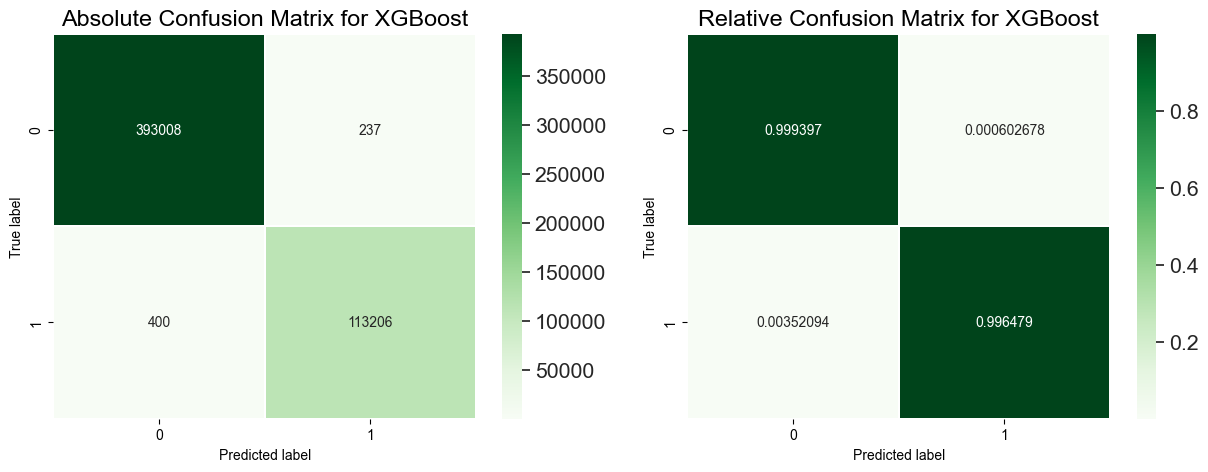

In [17]:
model = XGBoost_classification_tunned(best_hyperparams)

In [18]:

def while_XGBoost_classification_tunned(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best_results = (0,"",None,None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        for F, N in zip(
                [ features], # statistics_features, time_features, distribution_features, frequency_features, behavior_features, 
                [ "All"], # "Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based", 
        ):
                X_train = X_train_a[F]
                X_test = X_test_a[F] 
                model = XGBClassifier(
                        n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                        reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                        colsample_bytree=int(best_hyperparams['colsample_bytree']),
                        # subsample=int(best_hyperparams['subsample']),
                        # eta=best_hyperparams['eta'],
                )
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
                precision = precision_score(y_test, y_pred)  * 100
                recall = recall_score(y_test, y_pred)  * 100
                F1 = f1_score(y_test, y_pred)  * 100
                if N == "All":
                    tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\hline"
                    tmp_str += "\n"
                    tmp_f1 = F1
                elif N in ["Statistical-based", "Distribution-based", "Behavior-based"]:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
                else:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & \\rowcolor{LigthGray} " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
        if best_results[0] < tmp_f1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (tmp_f1, tmp_str, matrix, percentage_matrix, model)
    print("")
    print("")
    print("")
    print(best_results[0])
    print(best_results[1])
    plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4]

24


99.75555937264643
\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.89 & 99.83 & 99.68 & 99.76 \\
\hline



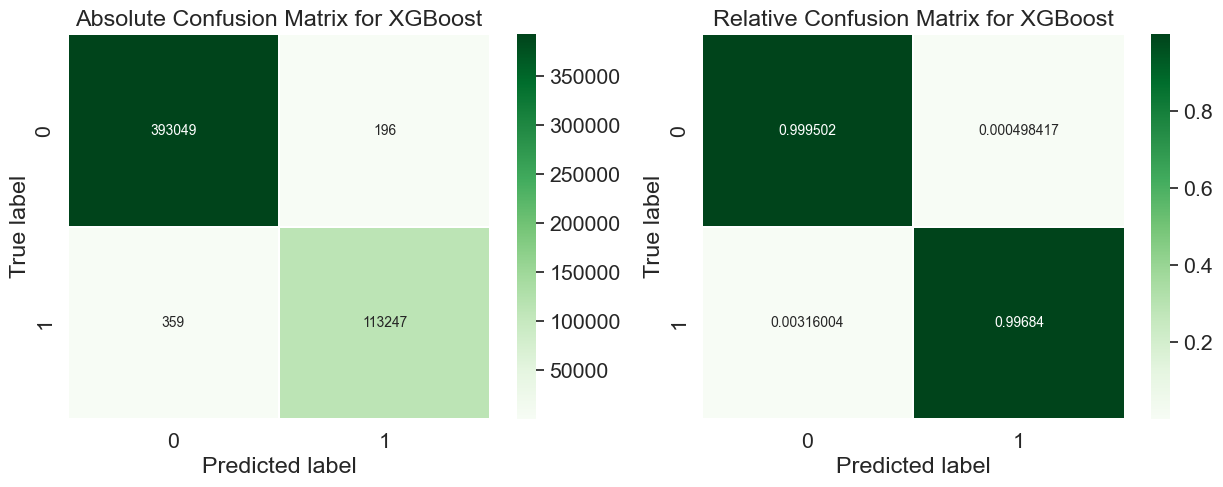

In [19]:
best_model = while_XGBoost_classification_tunned(best_hyperparams, cycles=25)

# Evaluation of model

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.89 & 99.79 & 99.70 & 99.74 \\
\hline



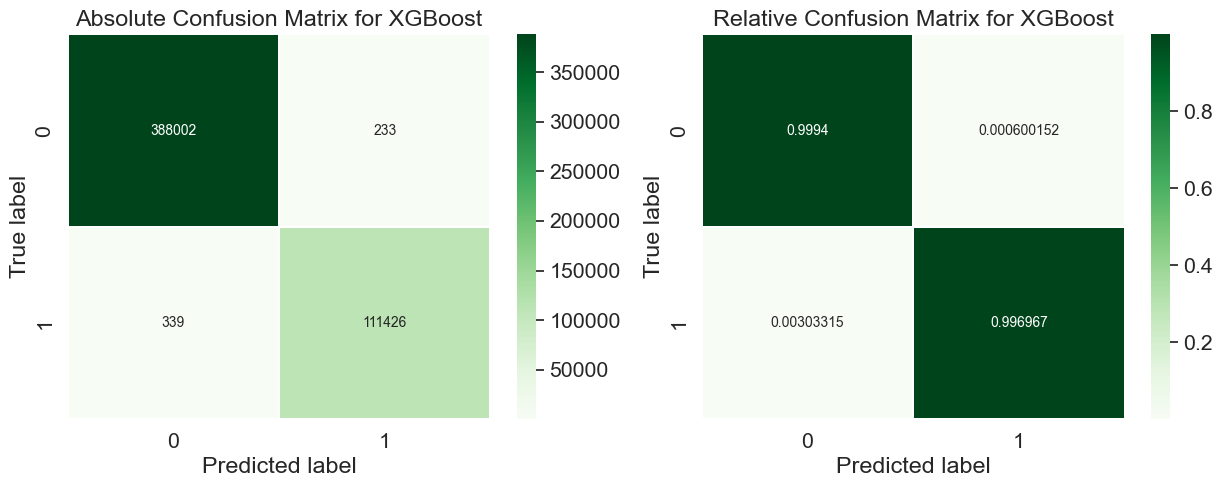

In [20]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

In [21]:
import csv

problem = "IDS_CIC-binary"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    writer.writerow([problem, "-", accuracy, precision, recall, F1, 0, 0, 0])

# Feature importance

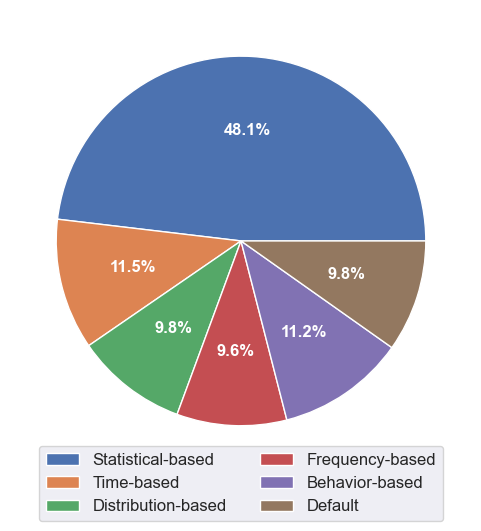

In [22]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()
f_df = feat_importances[default_faetures].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf, f_df]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based",  "Default"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [23]:
data

[0.4334389, 0.103278145, 0.08819816, 0.08660627, 0.101005554, 0.08819816]

In [24]:
feat_importances

PERIODICITY_SCDF       0.000000
SPECTRAL_SKEWNESS      0.000000
TIME                   0.000000
MEAN                   0.000000
CNT_NZ_DISTRIBUTION    0.000000
                         ...   
ENTROPY                0.078899
PACKETS_REV            0.085224
MEDIAN                 0.092408
HURST_EXPONENT         0.117901
VAR                    0.119167
Length: 76, dtype: float32

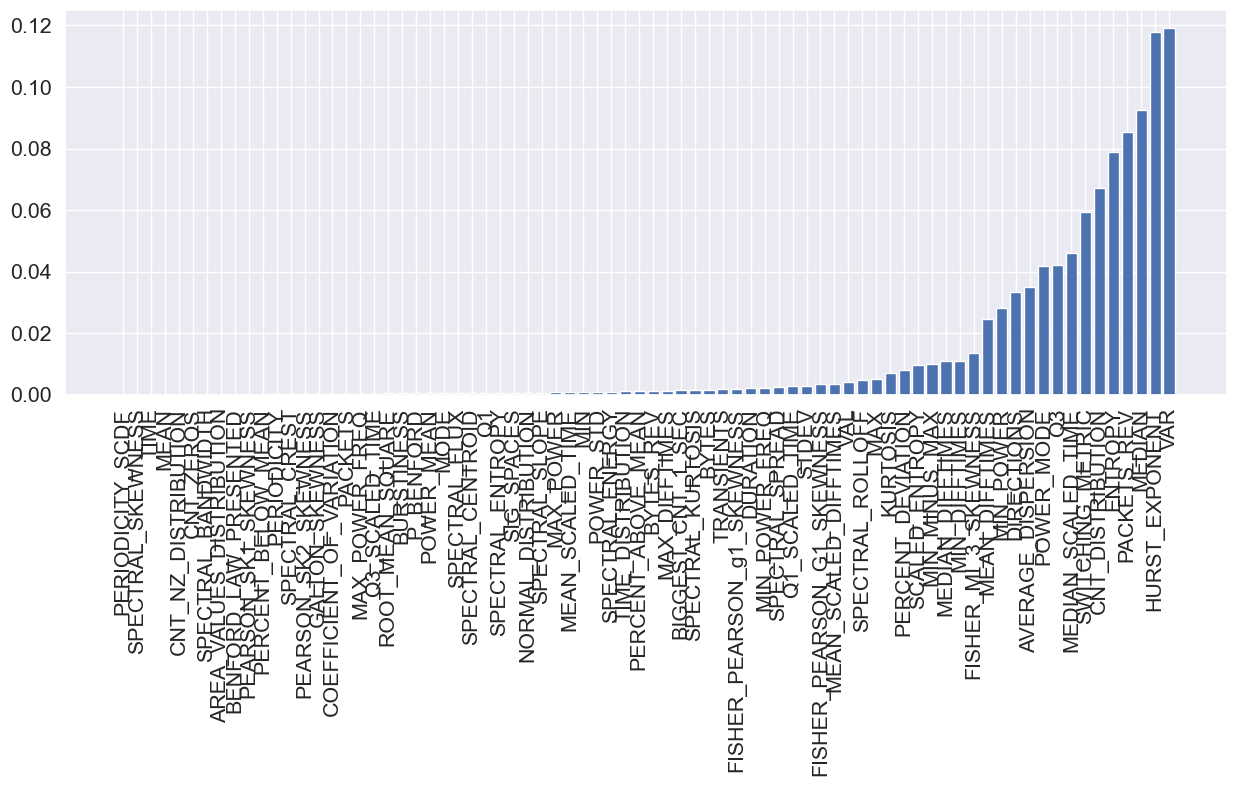

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [26]:
feat_importances.keys()

Index(['PERIODICITY_SCDF', 'SPECTRAL_SKEWNESS', 'TIME', 'MEAN',
       'CNT_NZ_DISTRIBUTION', 'CNT_ZEROS', 'SPECTRAL_BANDWIDTH',
       'AREA_VALUES_DISTRIBUTION', 'BENFORD_LAW_PRESENTED',
       'PEARSON_SK1_SKEWNESS', 'PERCENT_BELOW_MEAN', 'PERIODICITY',
       'SPECTRAL_CREST', 'PEARSON_SK2_SKEWNESS', 'GALTON_SKEWNESS',
       'COEFFICIENT_OF_VARIATION', 'PACKETS', 'MAX_POWER_FREQ',
       'Q3_SCALED_TIME', 'ROOT_MEAN_SQUARE', 'BURSTINESS', 'P_BENFORD',
       'POWER_MEAN', 'MODE', 'SPECTRAL_FLUX', 'SPECTRAL_CENTROID', 'Q1',
       'SPECTRAL_ENTROPY', 'SIG_SPACES', 'NORMAL_DISTRIBUTION',
       'SPECTRAL_SLOPE', 'MAX_POWER', 'MEAN_SCALED_TIME', 'MIN', 'POWER_STD',
       'SPECTRAL_ENERGY', 'TIME_DISTRIBUTION', 'PERCENT_ABOVE_MEAN',
       'BYTES_REV', 'MAX_DIFFTIMES', 'BIGGEST_CNT_1_SEC', 'SPECTRAL_KURTOSIS',
       'BYTES', 'TRANSIENTS', 'FISHER_PEARSON_g1_SKEWNESS', 'DURATION',
       'MIN_POWER_FREQ', 'SPECTRAL_SPREAD', 'Q1_SCALED_TIME', 'STDEV',
       'FISHER_PEARSON_G1_SKEWNES

In [27]:
feat_importances.to_dict()

{'PERIODICITY_SCDF': 0.0,
 'SPECTRAL_SKEWNESS': 0.0,
 'TIME': 0.0,
 'MEAN': 0.0,
 'CNT_NZ_DISTRIBUTION': 0.0,
 'CNT_ZEROS': 0.0,
 'SPECTRAL_BANDWIDTH': 0.0,
 'AREA_VALUES_DISTRIBUTION': 0.0,
 'BENFORD_LAW_PRESENTED': 0.0,
 'PEARSON_SK1_SKEWNESS': 0.0,
 'PERCENT_BELOW_MEAN': 0.0,
 'PERIODICITY': 0.00015888777852524072,
 'SPECTRAL_CREST': 0.0001898421032819897,
 'PEARSON_SK2_SKEWNESS': 0.0002000373788177967,
 'GALTON_SKEWNESS': 0.0002253981219837442,
 'COEFFICIENT_OF_VARIATION': 0.00025352739612571895,
 'PACKETS': 0.00026311795227229595,
 'MAX_POWER_FREQ': 0.00027059135027229786,
 'Q3_SCALED_TIME': 0.00031768743065185845,
 'ROOT_MEAN_SQUARE': 0.0003880506847053766,
 'BURSTINESS': 0.0004181178519502282,
 'P_BENFORD': 0.0004494365712162107,
 'POWER_MEAN': 0.0004537016211543232,
 'MODE': 0.0004656749952118844,
 'SPECTRAL_FLUX': 0.00047585999709554017,
 'SPECTRAL_CENTROID': 0.0005293465801514685,
 'Q1': 0.0005399332731030881,
 'SPECTRAL_ENTROPY': 0.0006235565524548292,
 'SIG_SPACES': 0.00066

# Feature selection

In [28]:
def perform_val(selected_features, best_hyperparams=None, cycles=10):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(100000), selected_features, verbose=False)
    
    X=df_features[selected_features]  # Features
    y=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test   
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
        )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
        precision = precision_score(y_test, y_pred)  * 100
        recall = recall_score(y_test, y_pred)  * 100
        F1 = f1_score(y_test, y_pred)  * 100
        if F1 > best:   
            best = F1
            best_model = model
            
    
    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
    precision = precision_score(y_validation, y_pred)  * 100
    recall = recall_score(y_validation, y_pred)  * 100
    F1 = f1_score(y_validation, y_pred)  * 100
    
    return accuracy,precision,recall,F1

In [29]:
import FEATURE_REDUCTED as FR
REPORTS = []

report = perform_val(FR.without_flow_header(FR.botnet_best_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.doh_best_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.dos_best_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.dns_malware_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.tor_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.vpn_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.all_best_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.combo_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.combo_2_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.crypto_features))
REPORTS.append(report)

100%|██████████| 100/100 [06:34<00:00,  3.94s/trial, best loss: -0.9834840445407667]
The best hyperparameters are :  

{'colsample_bytree': 0.8567812321639374, 'gamma': 1.1963855894047426, 'max_depth': 20.0, 'min_child_weight': 4.0, 'n_estimators': 400.0, 'reg_alpha': 3.0, 'reg_lambda': 0.35328646382478546}
100%|██████████| 100/100 [04:11<00:00,  2.51s/trial, best loss: -0.9899799599198397]
The best hyperparameters are :  

{'colsample_bytree': 0.018768075913543236, 'gamma': 2.956303936770837, 'max_depth': 40.0, 'min_child_weight': 10.0, 'n_estimators': 150.0, 'reg_alpha': 0.0, 'reg_lambda': 0.26254007515615735}
100%|██████████| 100/100 [06:54<00:00,  4.14s/trial, best loss: -0.9879535990481855]
The best hyperparameters are :  

{'colsample_bytree': 0.768864049294702, 'gamma': 1.8656274140976985, 'max_depth': 10.0, 'min_child_weight': 9.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.7759898983662168}
100%|██████████| 100/100 [06:19<00:00,  3.80s/trial, best loss: -0.987722

In [30]:
import csv

problem = "IDS_CIC-binary"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        writer.writerow([problem, f_set, report[0], report[1], report[2], report[3], 0, 0, 0])